# Ultimate Data Science Challenge

## Part 1 ‑ Exploratory data analysis

_The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them._

In [1]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import datetime

In [2]:
# read in login data

# -*- coding: utf-8 -*-
PATH1 = 'ultimate_challenge\\logins.json'
df_logins = pd.read_json(PATH1)

# Count number of logins per 15 minute interval
df_logins = df_logins.set_index('login_time')
df_logins['count'] = 1
df_login_intervals = df_logins.resample('15T').sum()

First, I resample the data as logins per 15 minute interval as specified by the challenge.

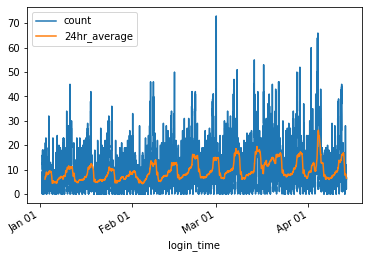

In [3]:
# basic line plot of the data

fig, ax = plt.subplots()
h_fmt = mdates.DateFormatter('%b %d')

df_login_intervals['24hr_average'] = df_login_intervals.iloc[:,0].rolling(window=96).mean()
df_login_intervals.plot(ax=ax, x_compat=True)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(h_fmt)
fig.autofmt_xdate()
plt.show()

The time series of this re-sampled data indicates the presence of a weekly cycle in user traffic. It also seems that the popularity of this location may be slowly increasing over time. I'll investigate each of these next, starting with the apparent rise in monthly use.

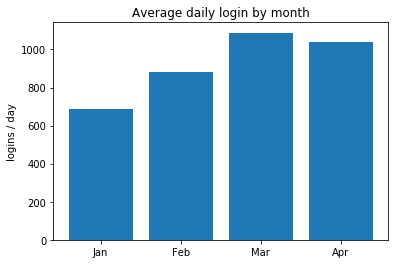

In [4]:
# average daily login by month

jan_login_total = df_login_intervals.loc['1970-01-01':'1970-01-31', 'count'].sum()
feb_login_total = df_login_intervals.loc['1970-02-01':'1970-02-28', 'count'].sum()
mar_login_total = df_login_intervals.loc['1970-03-01':'1970-03-31', 'count'].sum()
apr_login_total = df_login_intervals.loc['1970-04-01':'1970-04-13', 'count'].sum()

totals = [jan_login_total, feb_login_total, mar_login_total, apr_login_total]
height = np.divide(np.array([t for t in totals]), np.array([31,28,31,13]))

plt.bar(['Jan', 'Feb', 'Mar', 'Apr'], height=height)
plt.title('Average daily login by month')
plt.ylabel('logins / day')
plt.show()

Indeed, these is a noticable upward trend from January to March. April sees slightly fewer daily users than March so far, but this could change in the remaining weeks of the month.

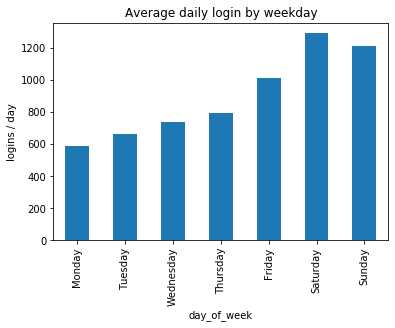

In [5]:
# average daily login by weekday
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_login_intervals['day_of_week'] = [i.strftime('%A') for i in list(pd.to_datetime(df_login_intervals.index))]
weekday_group = df_login_intervals.groupby('day_of_week')['count'].sum().reindex(weekdays)

#The range of dates given begins on Thurs, Jan 1, and ends on Mon, Apr 13, two days less than 15 full weeks.
day_totals = [15,14,14,15,15,15,15]
np.divide(weekday_group, day_totals).plot.bar()
plt.title('Average daily login by weekday')
plt.ylabel('logins / day')
plt.show()

A closer look at the weekly trend shows that traffic steadily picks up over the course of the week and peaks during the weekend.

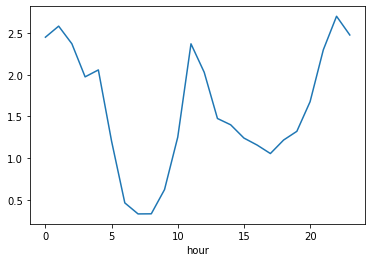

In [6]:
# Average hourly login
df_login_intervals['hour'] =  [i.hour for i in list(pd.to_datetime(df_login_intervals.index))]
total_hours = len(df_login_intervals)/4
hours = np.divide(df_login_intervals.groupby('hour', sort=True)['count'].sum(), total_hours).plot()
plt.show()

The hourly trend reveals that this location's peak hours occur near lunchtime and during the late evening, with troughs in the middle of the workday on either side of lunchtime.

Based on the weekly and daily trends shown above, I'm inclined to guess that the location in question is a bar, club, or some other place of dining and recreation that people may frequent during time off from work.

## Part 2 ‑ Experiment and metrics design

_The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs._

1. _What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?_

2. _Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:_

    _a. how you will implement the experiment_

    _b. what statistical test(s) you will conduct to verify the significance of the observation_

    _c. how you would interpret the results and provide recommendations to the city operations team along with any caveats._
    
#### My Answer:
The general form of the experiment would be an AB test; the control group would continue to follow
the established toll policy while the test group would receive the reimbursement. Each group should
be evenly split between the two cities, and since the test group is likely to be smaller than the 
control group, special attention should be given to ensure that it is a representative sample
(minimizing the presence of outliers).To gather enough data for meaningful results, the experiment 
should be run for several weeks (I would estimate 1 to 2 months, depending on the available budget).

If the new policy is effective, we should expect to see the test group outperform the control group
in terms of both total rides and percentage share of inter-city rides. While increasing rides
between cities appears to be the basic goal, increasing the total number of ride fares would be
necessary to offset the loss of toll revenue. For both of these metrics, a one-tailed Z-test
with a confidence interval of 95% would be a suitable test of statistical significance.

In the event of a successful test, I would recommend implementing the new toll policy for all
driver partners, with the caveat that if a significant loss of revenue occurs in spite of this,
perhaps the toll policy could be redesigned in some way, for example by relaxing the total rate 
or only charging the toll during particular hours (this would also necessitate additional testing, 
which would incur further costs). In the event of a failed test, the new policy should be discarded.

## Part 3 ‑ Predictive modeling

_Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge._

1. _Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?_
2. _Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance._
3. _Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice)._

### Data description

  ●  city: city this user signed up in

  ●  phone: primary device for this user

  ●  signup_date: date of account registration; in the form ‘YYYYMMDD’

  ●  last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
    
  ●  avg_dist: the average distance in miles per trip taken in the first 30 days after signup

  ●  avg_rating_by_driver: the rider’s average rating over all of their trips

  ●  avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

  ●  surge_pct: the percent of trips taken with surge multiplier > 1

  ●  avg_surge: The average surge multiplier over all of this user’s trips

  ●  trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up

  ●  ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise

  ●  weekday_pct: the percent of the user’s trips occurring during a weekday_

In [7]:
# import libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.inspection import permutation_importance

from mlxtend.plotting import plot_confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
# read in rider retention data

PATH2 = 'ultimate_challenge\\ultimate_data_challenge.json'
df_riders = pd.read_json(PATH2)

# create atrget variable `retained`
df_riders['time_since_last_ride'] = pd.to_datetime(df_riders.loc[:,'last_trip_date']) - \
    pd.to_datetime(df_riders.loc[:,'signup_date'])
df_riders['retained'] = df_riders['time_since_last_ride'] <= datetime.timedelta(days=30)

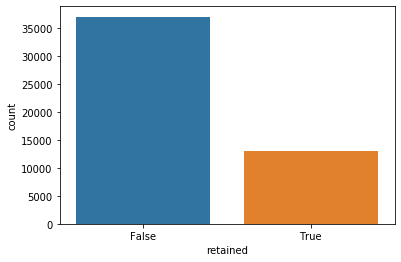

Users retained: 26.05%


In [9]:
# Check how many users were retained
sns.countplot('retained', data=df_riders)
plt.show()

value_counts = df_riders['retained'].value_counts()
print('Users retained: {:0.2f}%'.format(value_counts[1] / value_counts.sum() * 100))

In [10]:
# note data typers and check for missing values
df_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   city                    50000 non-null  object         
 1   trips_in_first_30_days  50000 non-null  int64          
 2   signup_date             50000 non-null  object         
 3   avg_rating_of_driver    41878 non-null  float64        
 4   avg_surge               50000 non-null  float64        
 5   last_trip_date          50000 non-null  object         
 6   phone                   49604 non-null  object         
 7   surge_pct               50000 non-null  float64        
 8   ultimate_black_user     50000 non-null  bool           
 9   weekday_pct             50000 non-null  float64        
 10  avg_dist                50000 non-null  float64        
 11  avg_rating_by_driver    49799 non-null  float64        
 12  time_since_last_ride    50000 no

The data contan a mix of numeric and categorical features. The target variable, `retained`, is a binary categorical feature, which informs me that this will be a binary classification problem.

Three features contain missing data: `avg_rating_of_driver` is missing 8122 entries, `phone` is missing 396 entries, and `avg_rating_by_driver` is missing 201 entries.

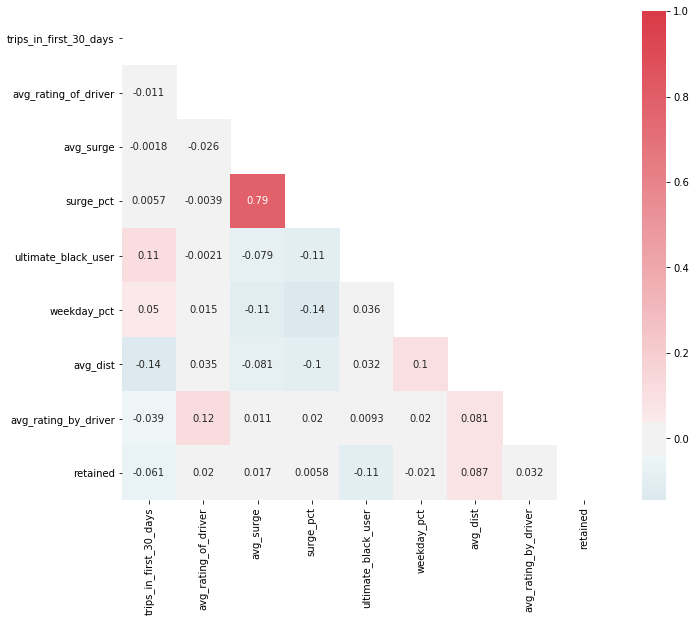

In [11]:
# plot heatmap of data features' correlations to one another

# the datetime features were used to derive the target variable and so could "leak" information to the target variable
X = df_riders.drop(['retained', 'time_since_last_ride', 'signup_date', 'last_trip_date'], axis=1)
y = df_riders['retained']

corr = X.join(y).corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, annot=True, center=0)
plt.show()

Most of the features exhibit low correlations to one another. However, `surge_pct` and `avg_surge` have a rather strong correlation of 0.79. This makes sense, since users with a high average surge multiplier are very likely to be frequent users during a surge, which results in a high surge percentage). Since these features are measuring such closely related metrics, I choose to keep only one of them for use in the predictive model - `surge_pct` is dropped when creating the train-test split below. 

In [12]:
# create train-test split
X_train, X_test, y_train, y_test = train_test_split(X.drop('surge_pct', axis=1), y, stratify=y, train_size=0.25)

After creating the training and testing sets, I begin to process the data. Earlier, I noted columns with missing values; the missing values in numeric columns will be imputed using the corresponding column's mean, and the missing values in categorical columns will simply be marked with the string `'missing'`. Categorical features will also be one-hot encoded.

In [13]:
numerical_features = ['avg_dist', 'avg_surge', 'avg_rating_of_driver', 
                      'avg_rating_by_driver', 'trips_in_first_30_days', 'weekday_pct']

categorical_features = ['city', 'phone', 'ultimate_black_user']

preprocessing = make_column_transformer(
    (SimpleImputer(strategy='mean'),
     numerical_features),
    (make_pipeline(
        (SimpleImputer(strategy='constant', missing_values=None, fill_value='missing')), 
        (OneHotEncoder(drop='first'))), 
     categorical_features)
)

Next, I build the data pipeline and perform a grid search to optimize the parameters for the Random Forest Classifier. I then evaluate the model based on the metrics calculated from the best estimator. Class weights are set to `'balanced'`, which - despite the name of the value - accounts for the data being unbalanced. That is, the fact that there are many more riders who are not retained than riders who are (recall that only 26.05% of riders are retained).

In [14]:
# Random Forest

rf_pipe = Pipeline([
    ('preprocess', preprocessing),
    ('classifier', RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=42))
])

# grid search and cross-validation
rf_param_grid = {'classifier__n_estimators':[25,50,100,200,300],
                 'classifier__max_depth':[2,4,6],
                 'classifier__min_samples_split':[2,4,6],
                 'classifier__min_samples_leaf':[1,2,3],
                 'classifier__max_features':['sqrt','log2']}

search = GridSearchCV(rf_pipe, param_grid=rf_param_grid, scoring='roc_auc', n_jobs=-1)
search.fit(X_train, y_train)

print(search.best_score_)
print(search.best_params_)

0.9458194747493186
{'classifier__max_depth': 6, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}


              precision    recall  f1-score   support

       False       0.97      0.83      0.89     27730
        True       0.65      0.92      0.76      9770

    accuracy                           0.85     37500
   macro avg       0.81      0.87      0.83     37500
weighted avg       0.89      0.85      0.86     37500



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x20e165ec108>)

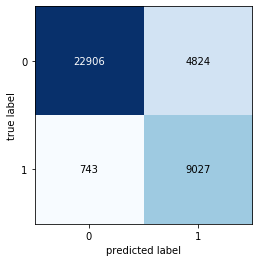

In [15]:
# plot metrics

y_pred = search.predict(X_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

The best classifier has an accuracy of 86% and precision, recall, and f1 scores of .66, .92, and, .77 on the positive (true) class, which are respectable results.

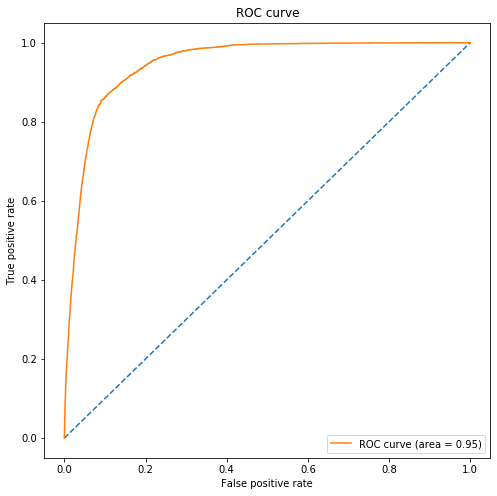

In [16]:
y_pred_prob = search.predict_proba(X_test)[:, 1]
fp_rate, tp_rate, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fp_rate, tp_rate)
plt.figure(figsize=(8,8))

plt.plot([0,1], [0,1], '--')
plt.plot(fp_rate, tp_rate, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

The area under the ROC curve is 0.95. An area of 0.5 would indicate that the model is no better than random guessing, and an area of 1 would indicate a perfect model, so 0.95 indicates that the model is a very strong predictor of rider retention.

Once we've established that the model has predictive value, we can use the feature importances to gain insight into which features are most likely responsible for long term rider retention. 

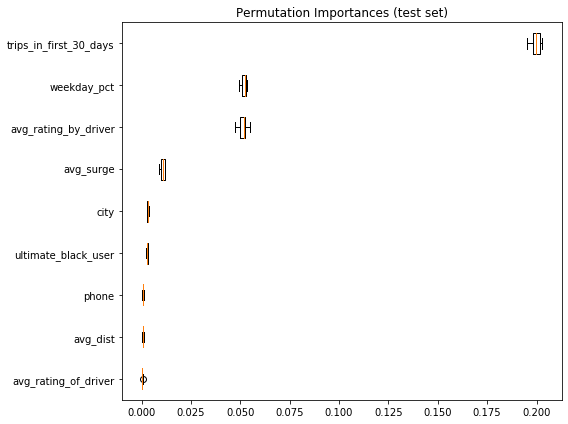

In [17]:
clf = search.best_estimator_

result = permutation_importance(clf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(8,6))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

The feature importances are plotted as a boxplot in order to visualize the range of uncertainty in the importances' values. In this case, the areas covered by the boxes are all quite low, so the potential variance of these values are similarly low.

Perhaps unsurprisingly, the strongest predictive feature is the number of trips taken in the first 30 days. This is probably because someone who uses Ultimate's services frequently both relies upon, and is satisfied with, the quality of service they receive. While this doesn't seem to offer much direction in the way of business strategy, it does reaffirm the importance of strong first impressions; a rider who becomes dissatisfied with the service early on is unlikely to remain for long.

Weekday percentage is another important feature. This is possibly an indication that the core userbase at Ultimate consists of those who commute to and from work using the service. If this is indeed the case, then Ultimate should consider targeting their advertisement toward people likely to be commuters, perhaps by advertising on websites used by business professionals or targeting areas that have a high volume of commuters (which I'm sure they already to, but it would be valuable to reaffirm the importance of that demographic).

The average rating of the rider by the driver is found to be much more important than the average rating of the driver by the rider. It could be that riders with lower ratings have a harder time finding drivers willing to pick them up, resulting in lower quality service (and eventually lower retention) for those users. Of course, it is important for the drivers' sake that their riders are hospitable, so strategy here should be focused on finding ways to help riders create a good experience for their drivers. I suspect this could also help with *driver* retention, though that is beyond the scope of this dataset.

Average surge (and with it, surge percentage) of somewhat lower importance. It seems reasonable to assume that the use of Ultimate's services during surges is not strongly indicative of a user's likelihood of being retained. The remaining features do not appear to be especially important at all, so I would not make recommendations based on those.